In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from matplotlib.ticker import MultipleLocator

import sys
sys.path.append('../')
from kinetic_fit.equations import *

Loding data into dataframes:

In [2]:
df_125nM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=3, nrows=9,  usecols='A:G')
df_250nM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=3, nrows=9,  usecols='J:P')
df_500nM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=3, nrows=9,  usecols='S:Y')
df_1uM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=17, nrows=8,  usecols='A:G')
df_2uM = pd.read_excel('Kcat_Km.xlsx', sheet_name='Sheet1', skiprows=17, nrows=8,  usecols='J:P')

Calculating K values for each event:

In [3]:
# Normalizing
def normalize(df_):
    df_.columns = ['Time (min)','A0','A1','A2','A3','A4','A5']
    return pd.concat([df_['Time (min)'],df_.iloc[:,1:].div(df_.iloc[:,1:].sum(axis=1), axis=0)], axis=1)
    
df_125nM = normalize(df_125nM)
df_250nM = normalize(df_250nM)
df_500nM = normalize(df_500nM)
df_1uM = normalize(df_1uM)
df_2uM = normalize(df_2uM)

In [4]:
k_vals = {'125nM':df_125nM, '250nM':df_250nM, '500nM':df_500nM, '1µM':df_1uM, '2µM':df_2uM}
for key in k_vals.keys():
    df = k_vals[key]
    fit = ParameterFitter(t = df['Time (min)'], A_ = [df['A0'], df['A1'], df['A2'], df['A3'], df['A4'], df['A5']])
    fit.fit()
    k_vals[key] = fit.get_parameters()

In [5]:
# # Plot k values
# fig, ax = plt.subplots(figsize=(5, 3.5))
# for key in k_vals.keys():
#     ax.scatter(np.arange(1, 7), k_vals[key], label=key, s=30)

# ax.set_ylabel(r'$K_{\text{obs}}$ (min$^{-1}$)', fontsize=13, family='serif')
# ax.set_xlabel(r'$A_{\text{n}}$ added', fontsize=13, family='serif')

# plt.minorticks_on()
# plt.tick_params(axis='both', which='major', labelsize=12, length=6)
# plt.gca().tick_params(axis='x', which='minor', bottom=False)
# plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))
# plt.tick_params(axis='y', which='minor', length=4)
# plt.title(r'$K_{cat}/K_{m}$', family='serif', fontsize=13)

# legend = ax.legend(fontsize=12, bbox_to_anchor=(1.005, 1), loc='upper left')
# plt.savefig('k_vs_A_1.png', dpi=250, bbox_inches='tight')

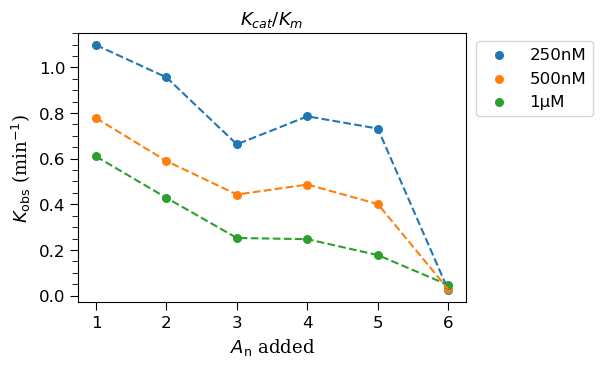

In [5]:
# Plot k values
fig, ax = plt.subplots(figsize=(5, 3.5))
for key in k_vals.keys():
    if key in ['250nM', '500nM', '1µM']:
        ax.scatter(np.arange(1, 7), k_vals[key], label=key, s=30)
        plt.plot(np.arange(1, 7),k_vals[key], '--')

ax.set_ylabel(r'$K_{\text{obs}}$ (min$^{-1}$)', fontsize=13, family='serif')
ax.set_xlabel(r'$A_{\text{n}}$ added', fontsize=13, family='serif')

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12, length=6)
plt.gca().tick_params(axis='x', which='minor', bottom=False)
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))
plt.tick_params(axis='y', which='minor', length=4)
plt.title(r'$K_{cat}/K_{m}$', family='serif', fontsize=13)

legend = ax.legend(fontsize=12, bbox_to_anchor=(1.005, 1), loc='upper left')
plt.savefig('k_vs_A_2.png', dpi=250, bbox_inches='tight')

In [32]:
def invert_df(df):
    df1 = df[['Time (min)', 'A5', 'A4', 'A3', 'A2', 'A1', 'A0']].T
    plt.imshow(df1.to_numpy()[1:,:], cmap='viridis')
    plt.xticks(range(len(df)), df_125nM['Time (min)'])

In [34]:
df_125nM

,Time (min),A0,A1,A2,A3,A4,A5
0,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.175816,0.449533,0.047403,0.050932,0.022802,0.253514
2,2,0.000000,0.164668,0.234513,0.109961,0.066650,0.424207
3,3,0.000000,0.096539,0.225003,0.187707,0.151802,0.338949
4,4,0.000000,0.051139,0.177514,0.201751,0.191920,0.377676
5,5,0.000000,0.018374,0.118659,0.191823,0.195405,0.475739
6,10,0.000000,0.000000,0.016244,0.085349,0.227305,0.671102
7,25,0.000000,0.000000,0.000000,0.025087,0.197449,0.777464


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

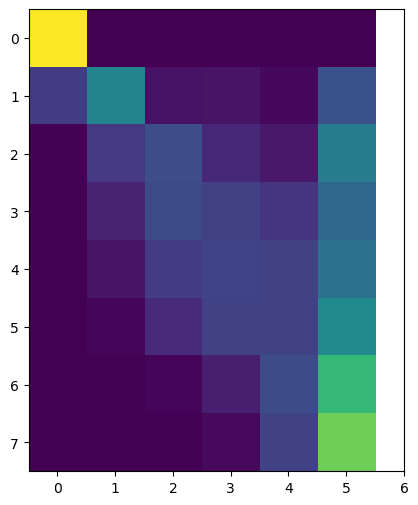

In [19]:
data = df_125nM.drop('Time (min)', axis=1).to_numpy()

# Create the imshow plot
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='viridis')
plt.xticks(range(len(df_125nM.columns)), df_125nM.columns[:-1], rotation=90)
plt.yticks(range(len(df_125nM)), df_125nM['Time (min)'])
plt.colorbar()
plt.title('Imshow Plot of the Data')
plt.show()